In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
print(X[:10], y[:10])
print(f"X verisinin shape'i : {X.shape}, y targetinin shape'i {y.shape}")

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
X verisinin shape'i : torch.Size([50, 1]), y targetinin shape'i torch.Size([50, 1])


### Splittin data into training and test sets

In [4]:
# Create a train/test split

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
print(f"X veri boyutu: {X.shape}, y veri boyutu: {y.shape}, ")
print(f"Train X veri boyutu: {X_train.shape}, train y veri boyutu: {y_train.shape}, ")
print(f"Test X veri boyutu: {X_test.shape}, test y veri boyutu: {y_test.shape}, ")

X veri boyutu: torch.Size([50, 1]), y veri boyutu: torch.Size([50, 1]), 
Train X veri boyutu: torch.Size([40, 1]), train y veri boyutu: torch.Size([40, 1]), 
Test X veri boyutu: torch.Size([10, 1]), test y veri boyutu: torch.Size([10, 1]), 


In [4]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
    
    plt.figure(figsize=(10,7))

    # Plot training data in blue

    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

     # Plot training data in green

    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

    if predictions is not None:
        # Plot the predictions
        plt.scatter(test_data, predictions, c="r", s=4, label= "Predictions")

    plt.legend(prop={"size":14})

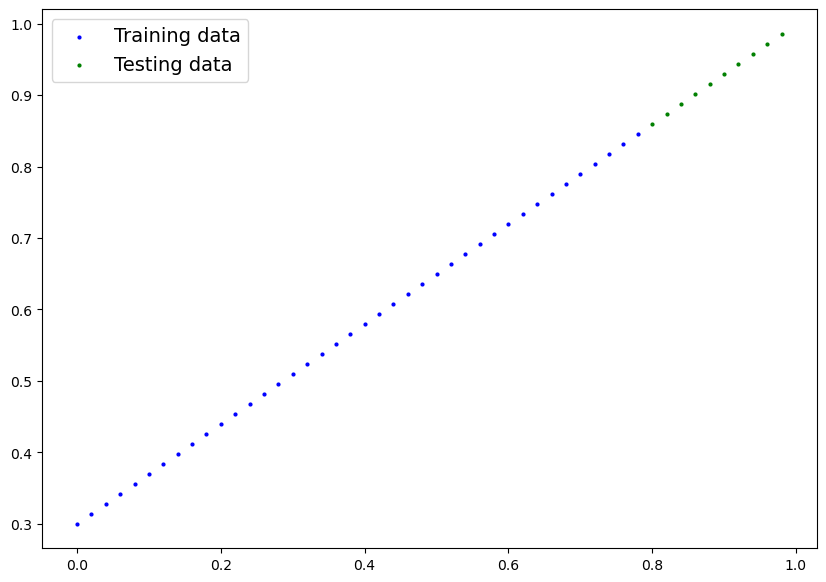

In [5]:
plot_predictions();

## Build model

In [6]:
from torch import nn
# Create a linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
        # Forward method

    def forward(self, x: torch.Tensor) -> torch.Tensor: 
         return self.weights * x + self.bias
        


### Cecking the contents of model


In [7]:
# Create a random seed

torch.manual_seed(42)

# Create an instance of the model

model_0 = LinearRegressionModel()

# Check out the parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Making prediction using torch.inference_mode()

In [8]:
 # Make predictions

with torch.inference_mode(): # Disables all the training stuff like gradients , it makes prediction faster
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

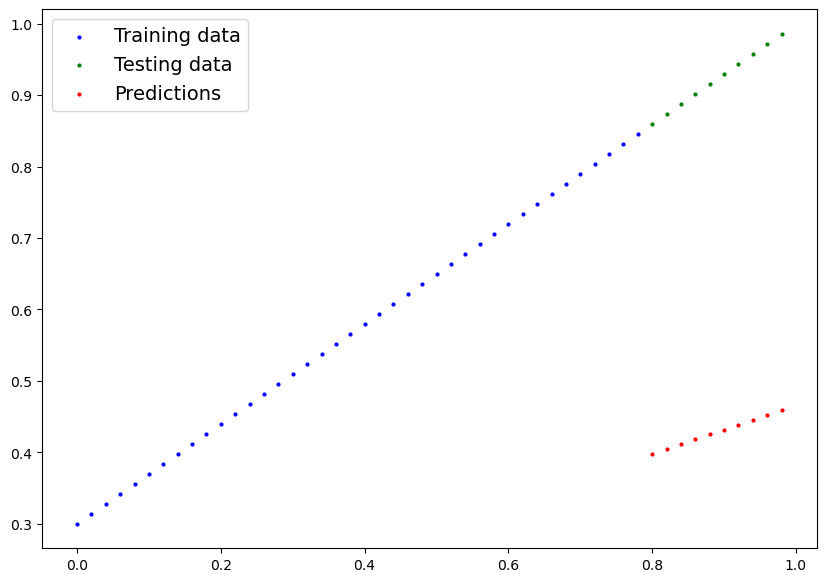

In [9]:
plot_predictions(predictions=y_preds)

## Train model

**Loss function:** A function to measure how wrong the model's predictions are, lower is better

**Optimize:** Takes into account the loss of a model and adjusts the parameters (weights, bias)

In [10]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimize
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [11]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss

    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad

    optimizer.zero_grad()

    # 4. Backpropogation

    loss.backward()

    # 5. Step the optimizer

    optimizer.step()


    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation
    with torch.inference_mode(): # turns off gradient tracking & more
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # Calculate the test loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

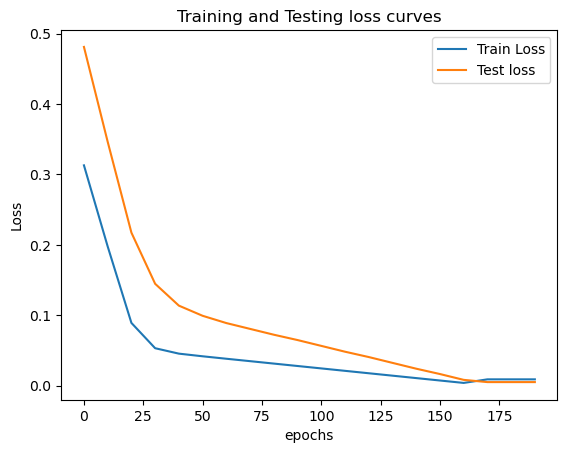

In [12]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and Testing loss curves")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()


In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [18]:

with torch.inference_mode(): # Disables all the training stuff like gradients , it makes prediction faster
    y_preds_new = model_0(X_test)



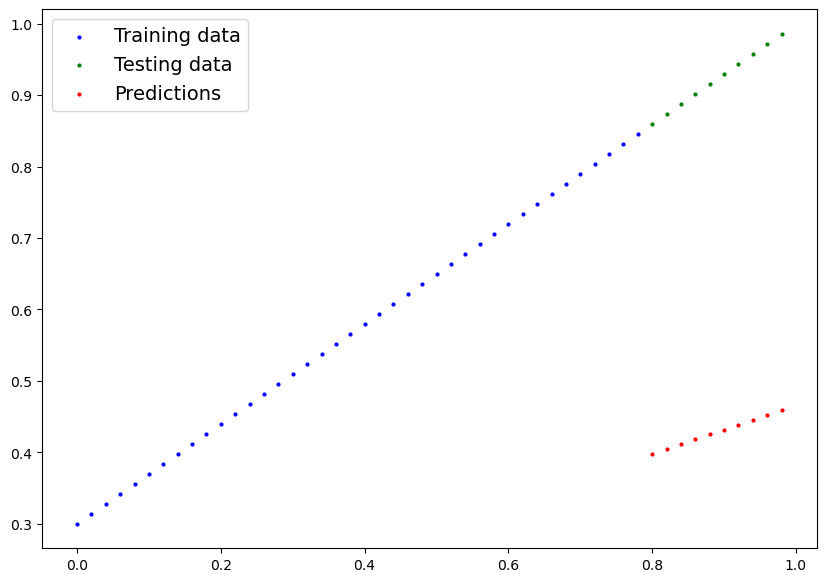

In [19]:
plot_predictions(predictions=y_preds)

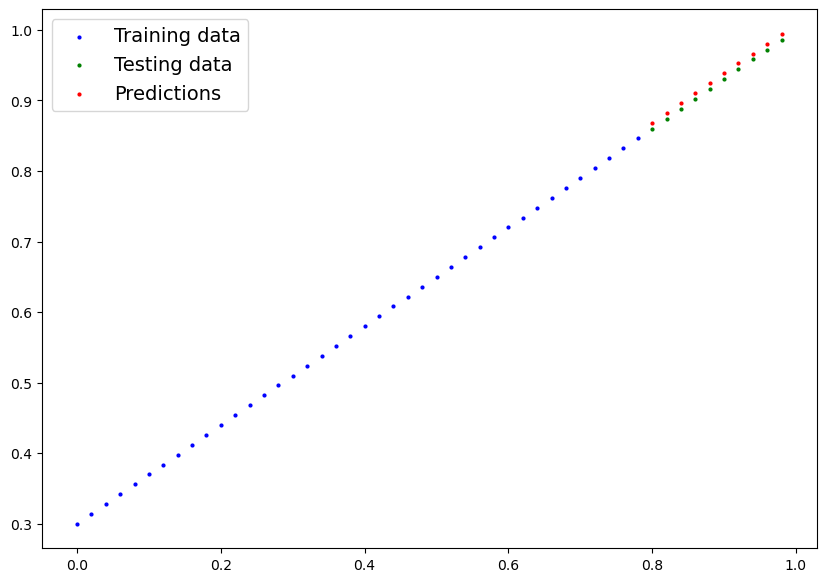

In [20]:
plot_predictions(predictions=y_preds_new)

## Saving a model in Pytorch

In [14]:
# Saving our Pytorch model

from pathlib import Path

# 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model.state_dict()
print(f"Saving model to: {MODEL_SAVE_PATH} ")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth 


## Loading a PyTorch model

In [17]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_o
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [18]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

## Putting it all together

In [20]:
import torch
import matplotlib.pyplot as plt
from torch import nn

Create device-agnostic code

This means if we've got access to a GPU, our code will use it. 

If no GPU is available, the code will default to using CPU

In [21]:
# Setup device agnostic code

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [26]:
# Create some data using the linear regression formula y = weight * X + bias

weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y 

X = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [27]:
# Split the data

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

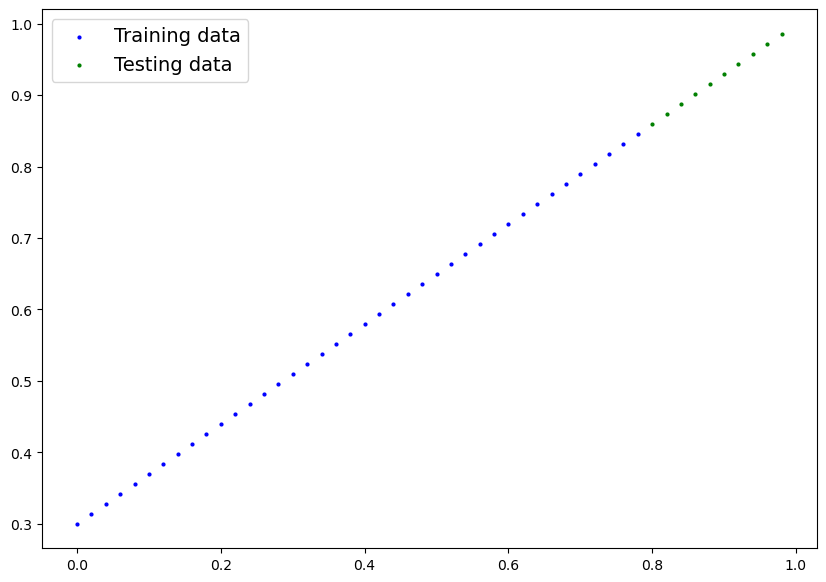

In [28]:
# Plot the data

plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [29]:
# Create a linear model by subclassing nn.Moudle

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor :
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [30]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

### 6.3 Training

For training we need:

* Loss function
* Optimizer
* Training loop
* Testing loop

In [35]:
# Setup the loss function
loss_fn = nn.L1Loss() # Same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [36]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backpropogation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    
    # Print out

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [37]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### 6.4 Making and evaluating predictions

In [38]:
# Turn the model into eval mode

model_1.eval()

# Make predictions on the test data

with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

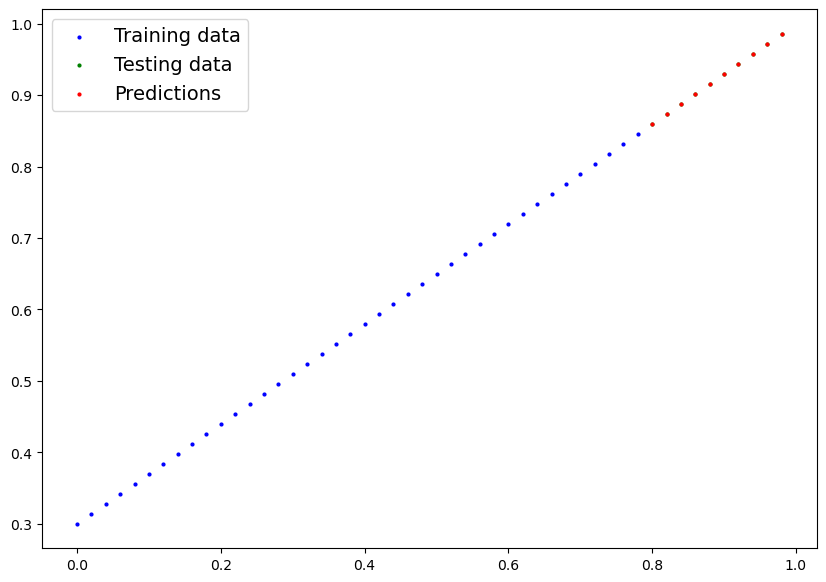

In [39]:
plot_predictions(predictions=y_preds.cpu())

# EXERCISES FROM SCRATCH


    Create a straight line dataset using the linear regression formula (weight * X + bias).

    Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
    Split the data into 80% training, 20% testing.
    Plot the training and testing data so it becomes visual.


In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [27]:
weight = 0.3
bias = 0.9

start = 0
finish = 1
step = 0.01

X = torch.arange(start,finish,step).unsqueeze(dim=1)
y = weight * X + bias

In [28]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [29]:
split_rate = int(0.8 * len(X))

X_train, y_train = X[:split_rate], y[:split_rate]
X_test, y_test = X[split_rate:], y[split_rate:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

In [30]:
def visualize(train_data, train_labels, test_data, test_labels,predictions=None):
    plt.figure(figsize=(10,7))

    # Plot training data in blue

    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

     # Plot training data in green

    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

    if predictions is not None:
        # Plot the predictions
        plt.scatter(test_data, predictions, c="r", s=4, label= "Predictions")

    plt.legend(prop={"size":14})

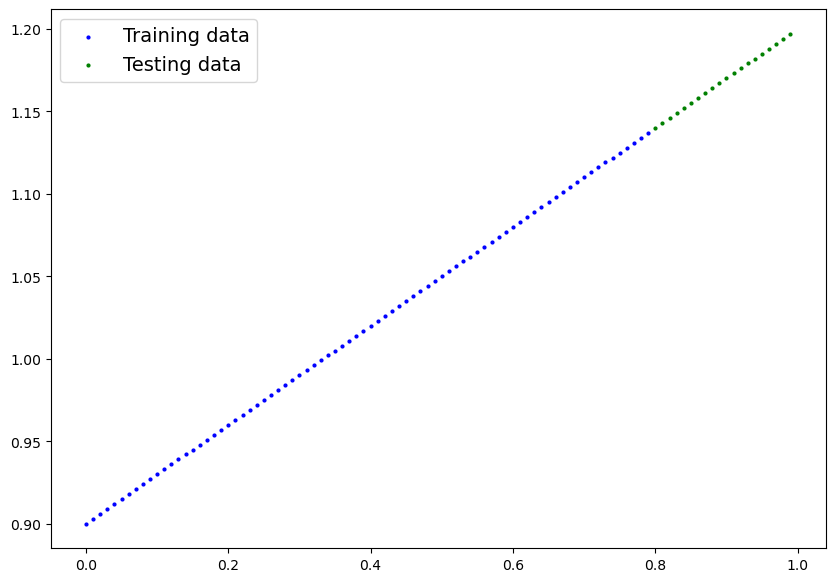

In [31]:
visualize(X_train, y_train, X_test, y_test)

In [32]:
class LinearRegressionExercise(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor :
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model = LinearRegressionExercise()
model, model.state_dict()
    

(LinearRegressionExercise(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [34]:
next(model.parameters()).device

device(type='cpu')

In [37]:
# Instantiate the model and put it to the target device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [39]:
epochs = 300
# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
# Setup the loss function
loss_fn = nn.L1Loss() # Same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

     # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backpropogation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred, y_test)

    
    # Print out

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Loss: 0.1275613158941269 | Test loss: 0.33650314807891846
Epoch: 10 | Loss: 0.09455728530883789 | Test loss: 0.2632443606853485
Epoch: 20 | Loss: 0.08187223970890045 | Test loss: 0.21840262413024902
Epoch: 30 | Loss: 0.07603923231363297 | Test loss: 0.19146588444709778
Epoch: 40 | Loss: 0.07207288593053818 | Test loss: 0.17458660900592804
Epoch: 50 | Loss: 0.06853923946619034 | Test loss: 0.1628156453371048
Epoch: 60 | Loss: 0.06507988274097443 | Test loss: 0.15310420095920563
Epoch: 70 | Loss: 0.06165384128689766 | Test loss: 0.14511261880397797
Epoch: 80 | Loss: 0.05822876840829849 | Test loss: 0.1367770880460739
Epoch: 90 | Loss: 0.05480272322893143 | Test loss: 0.12878552079200745
Epoch: 100 | Loss: 0.05137667804956436 | Test loss: 0.12079393863677979
Epoch: 110 | Loss: 0.04795161262154579 | Test loss: 0.11245840787887573
Epoch: 120 | Loss: 0.04452557489275932 | Test loss: 0.10446684807538986
Epoch: 130 | Loss: 0.04109952598810196 | Test loss: 0.0964752659201622
Epoch: 1